In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

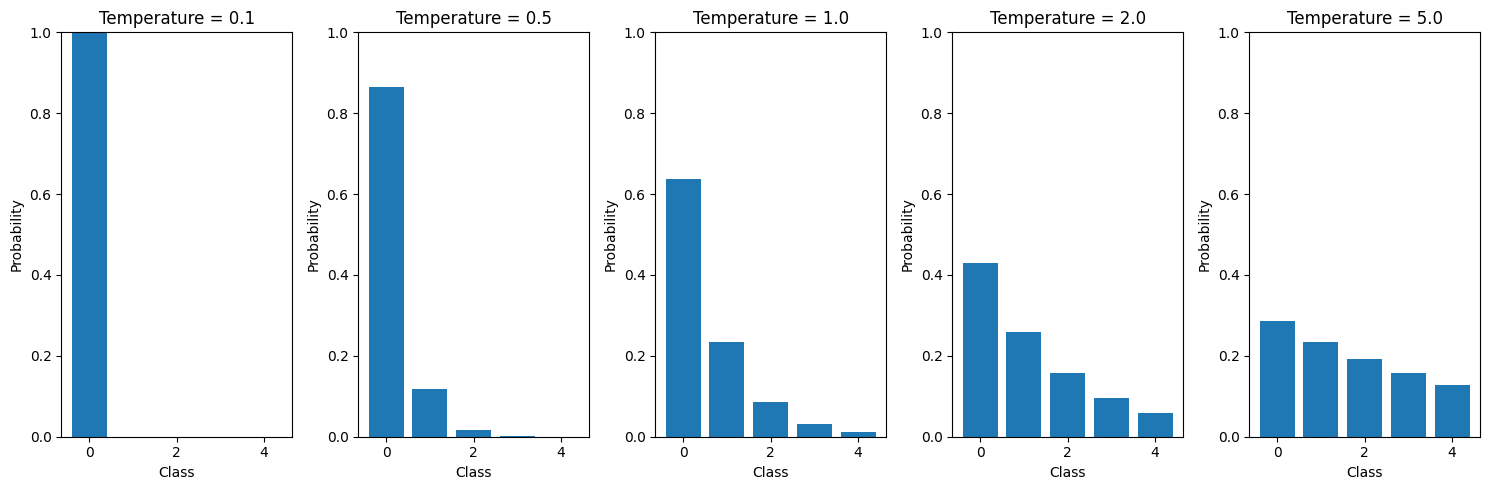

In [2]:
# Define some example logits (pre-softmax values)
logits = np.array([2.0, 1.0, 0.0, -1.0, -2.0])

# Define different temperature values to test
temperatures = [0.1, 0.5, 1.0, 2.0, 5.0]

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot probability distributions for each temperature
for i, temp in enumerate(temperatures, 1):
    plt.subplot(1, len(temperatures), i)
    
    # Apply temperature scaling and softmax
    scaled_logits = logits / temp
    probs = np.exp(scaled_logits) / np.sum(np.exp(scaled_logits))
    
    # Create bar plot
    plt.bar(range(len(logits)), probs)
    plt.title(f'Temperature = {temp}')
    plt.ylim(0, 1)
    plt.xlabel('Class')
    plt.ylabel('Probability')

plt.tight_layout()
plt.show()


In [6]:
# Let's explain the temperature scaling formula for softmax probabilities

# The formula qi = exp(zi/T) / sum(exp(zj/T)) represents temperature-scaled softmax, where:
# - qi is the output probability for class i
# - zi is the logit (pre-softmax activation) for class i 
# - T is the temperature parameter
# - The sum in denominator is over all classes j

# Let's demonstrate with a simple example
logit = 2.0  # Single logit zi
temp = 0.5   # Temperature T

# Calculate numerator: exp(zi/T)
numerator = np.exp(logit/temp)
print(f"Numerator exp(zi/T) = {numerator:.4f}")

# Calculate denominator: sum(exp(zj/T))
logits_array = np.array([2.0, 1.0, 0.0])  # Multiple logits zj
denominator = np.sum(np.exp(logits_array/temp))
print(f"Denominator sum(exp(zj/T)) = {denominator:.4f}")

# Calculate final probability qi
prob = numerator/denominator
print(f"\nFinal probability qi = {prob:.4f}")

# Key observations:
# 1. Lower temperature (T<1) makes distribution more peaked/confident
# 2. Higher temperature (T>1) makes distribution more uniform/smooth
# 3. T=1 gives standard softmax without scaling


Numerator exp(zi/T) = 54.5982
Denominator sum(exp(zj/T)) = 62.9872

Final probability qi = 0.8668


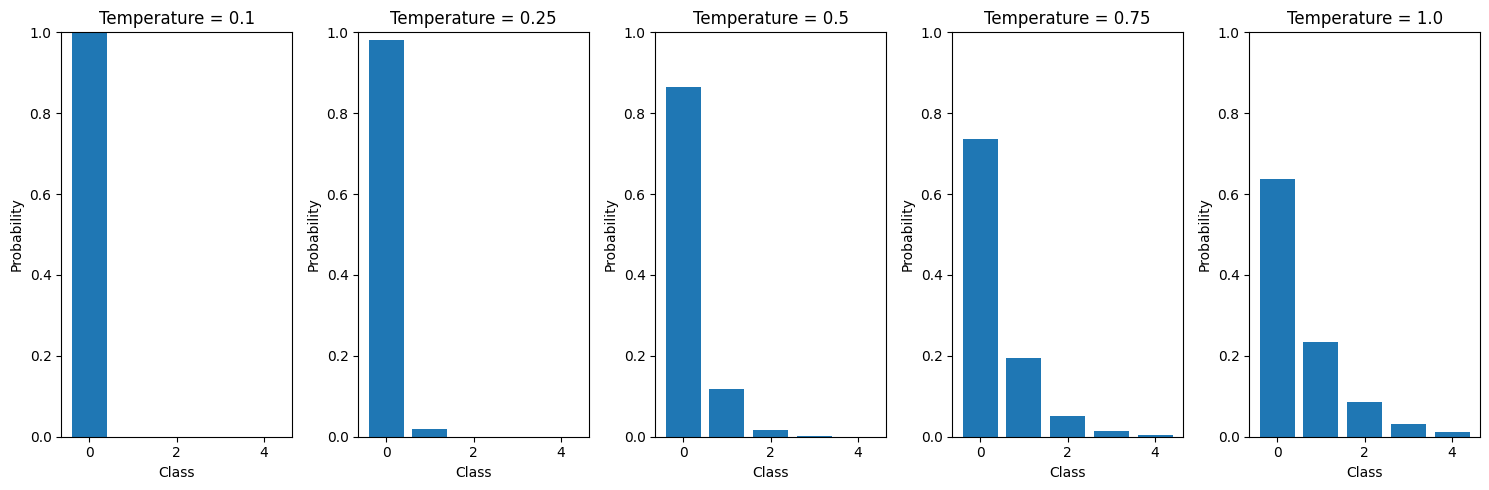

In [3]:
# Define some example logits (pre-softmax values)
logits = np.array([2.0, 1.0, 0.0, -1.0, -2.0])

# Define different temperature values to test (between 0 and 1)
temperatures = [0.1, 0.25, 0.5, 0.75, 1.0]

# Create a figure with subplots
plt.figure(figsize=(15, 5))

# Plot probability distributions for each temperature
for i, temp in enumerate(temperatures, 1):
    plt.subplot(1, len(temperatures), i)
    
    # Apply temperature scaling and softmax
    scaled_logits = logits / temp
    probs = np.exp(scaled_logits) / np.sum(np.exp(scaled_logits))
    
    # Create bar plot
    plt.bar(range(len(logits)), probs)
    plt.title(f'Temperature = {temp}')
    plt.ylim(0, 1)
    plt.xlabel('Class')
    plt.ylabel('Probability')

plt.tight_layout()
plt.show()


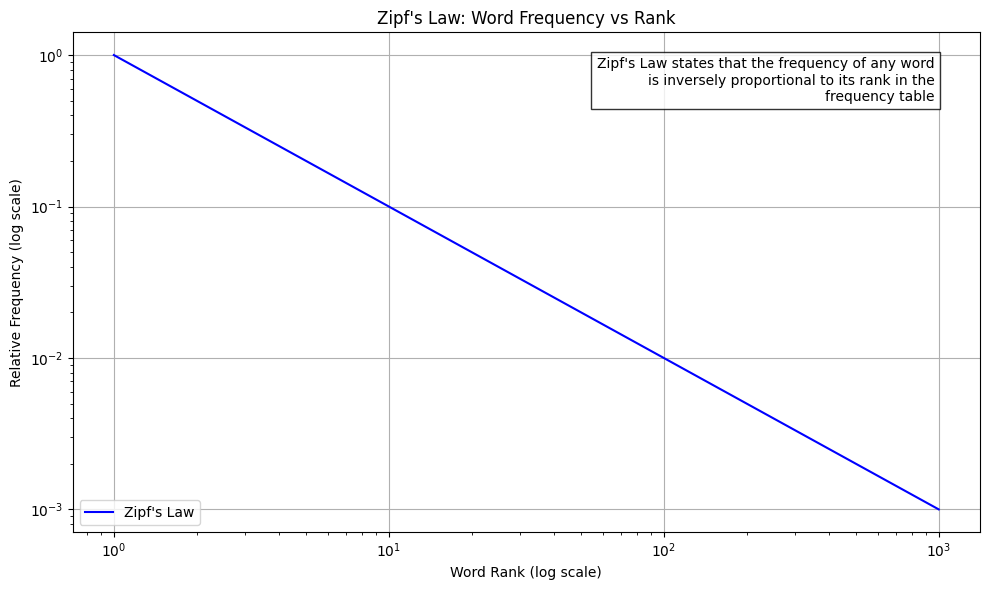

In [1]:
# Example of Zipf's Law for word frequencies
import numpy as np
import matplotlib.pyplot as plt

# Generate ranks from 1 to 1000
ranks = np.arange(1, 1001)

# Calculate frequencies using Zipf's Law: frequency ∝ 1/rank
frequencies = 1/ranks

# Create the plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, 'b-', label="Zipf's Law")
plt.grid(True)

plt.title("Zipf's Law: Word Frequency vs Rank")
plt.xlabel('Word Rank (log scale)')
plt.ylabel('Relative Frequency (log scale)')
plt.legend()

# Add text annotation explaining Zipf's Law
plt.text(0.95, 0.95, 
         "Zipf's Law states that the frequency of any word\n" +
         "is inversely proportional to its rank in the\n" +
         "frequency table", 
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


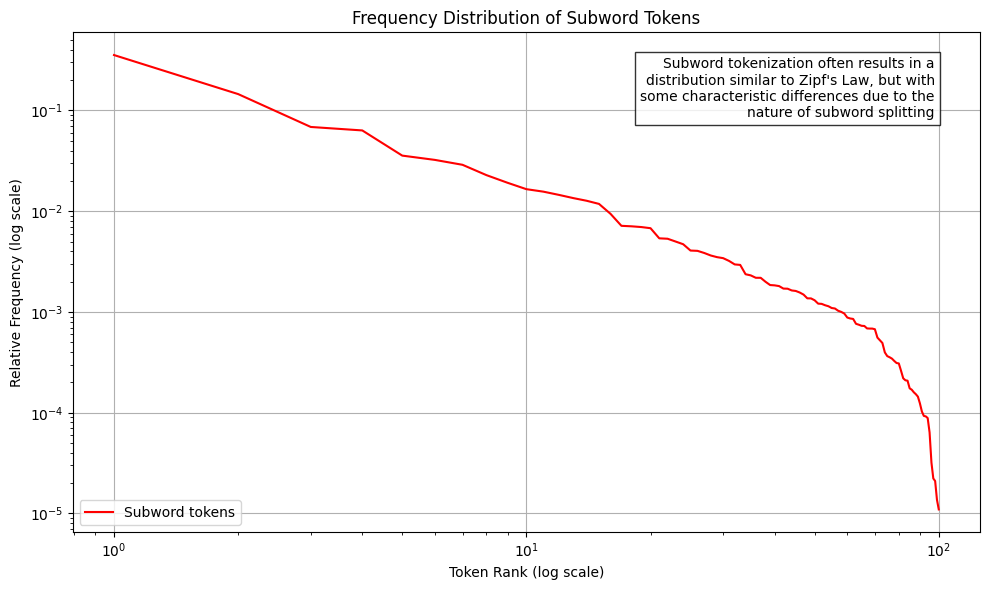

In [3]:
# Example of subword tokenization frequency distribution
import numpy as np
import matplotlib.pyplot as plt

# Sample text for tokenization (you may want to use your actual tokenized data)
text = "The quick brown fox jumps over the lazy dog. This is a sample text to demonstrate subword tokenization."

# Simulate subword token frequencies (replace this with actual tokenizer output)
# This is a simplified example - actual subword distributions may vary
n_tokens = 100
# Generate frequencies that follow roughly Zipfian distribution but with some variation
frequencies = np.random.pareto(1, n_tokens) 
frequencies = frequencies / frequencies.sum()  # Normalize

# Sort frequencies in descending order
frequencies = np.sort(frequencies)[::-1]
ranks = np.arange(1, len(frequencies) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, 'r-', label='Subword tokens')
plt.grid(True)

plt.title('Frequency Distribution of Subword Tokens')
plt.xlabel('Token Rank (log scale)')
plt.ylabel('Relative Frequency (log scale)')
plt.legend()

# Add text annotation
plt.text(0.95, 0.95, 
         "Subword tokenization often results in a\n" +
         "distribution similar to Zipf's Law, but with\n" +
         "some characteristic differences due to the\n" +
         "nature of subword splitting",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


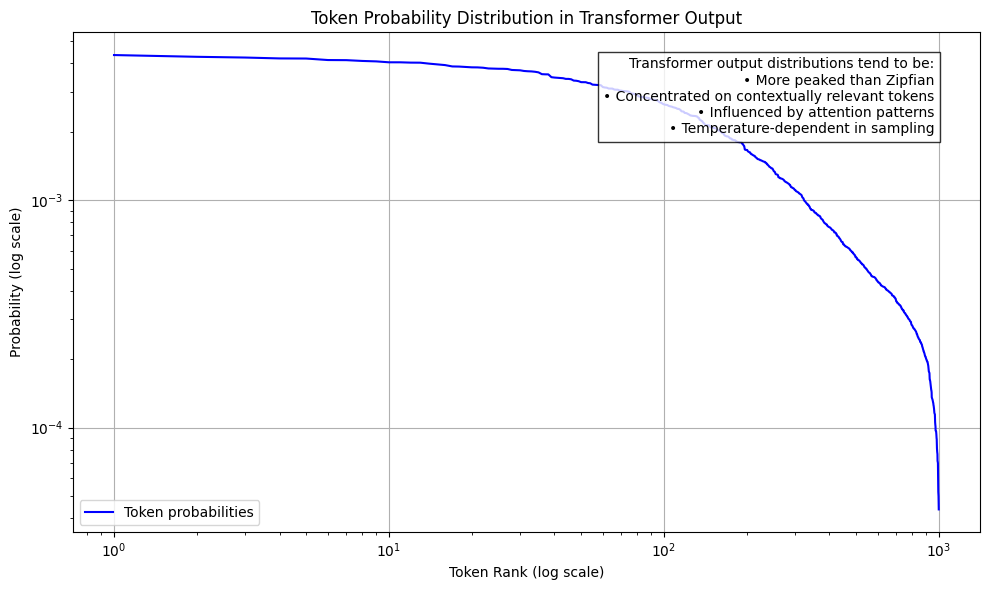

In [4]:
# Analyzing token distribution in response to natural language prompts
import numpy as np
import matplotlib.pyplot as plt

# Simulate token probabilities from a transformer's output distribution
# This represents the probability distribution over the vocabulary after processing a prompt
n_tokens = 1000
# Generate a more peaked distribution typical of transformer outputs
# Using modified softmax-like distribution
x = np.linspace(0, 10, n_tokens)
logits = np.exp(-x/2) + 0.1*np.random.random(n_tokens)
probabilities = logits / logits.sum()

# Sort probabilities in descending order
probabilities = np.sort(probabilities)[::-1]
ranks = np.arange(1, len(probabilities) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, probabilities, 'b-', label='Token probabilities')
plt.grid(True)

plt.title('Token Probability Distribution in Transformer Output')
plt.xlabel('Token Rank (log scale)')
plt.ylabel('Probability (log scale)')
plt.legend()

# Add text annotation explaining the distribution
plt.text(0.95, 0.95,
         "Transformer output distributions tend to be:\n" +
         "• More peaked than Zipfian\n" +
         "• Concentrated on contextually relevant tokens\n" +
         "• Influenced by attention patterns\n" +
         "• Temperature-dependent in sampling",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


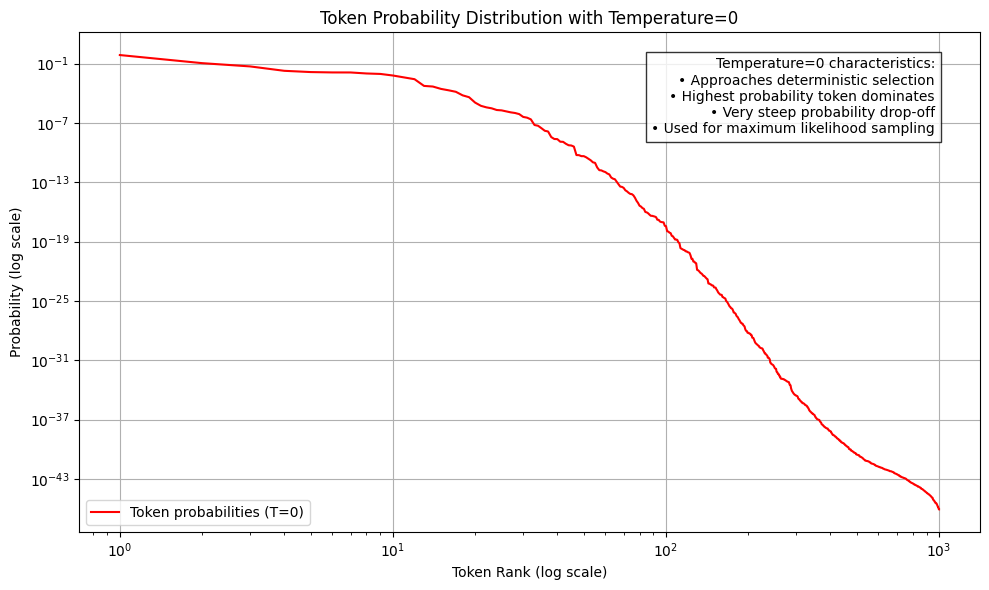

In [5]:
# Analyzing token distribution with temperature=0 (deterministic/greedy sampling)
import numpy as np
import matplotlib.pyplot as plt

# Simulate token probabilities with temperature=0
# This will create a much more peaked distribution where probability mass concentrates on top tokens
n_tokens = 1000
x = np.linspace(0, 10, n_tokens)
logits = np.exp(-x/2) + 0.1*np.random.random(n_tokens)

# Apply temperature=0 effect (approaches one-hot)
# We'll simulate this by heavily concentrating probability mass on top tokens
temperature = 0.01  # Very close to 0 (avoiding division by 0)
logits = logits/temperature
probabilities = np.exp(logits) / np.sum(np.exp(logits))

# Sort probabilities in descending order
probabilities = np.sort(probabilities)[::-1]
ranks = np.arange(1, len(probabilities) + 1)

# Create the plot
plt.figure(figsize=(10, 6))
plt.loglog(ranks, probabilities, 'r-', label='Token probabilities (T=0)')
plt.grid(True)

plt.title('Token Probability Distribution with Temperature=0')
plt.xlabel('Token Rank (log scale)')
plt.ylabel('Probability (log scale)')
plt.legend()

# Add text annotation explaining the effect of temperature=0
plt.text(0.95, 0.95,
         "Temperature=0 characteristics:\n" +
         "• Approaches deterministic selection\n" +
         "• Highest probability token dominates\n" +
         "• Very steep probability drop-off\n" +
         "• Used for maximum likelihood sampling",
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


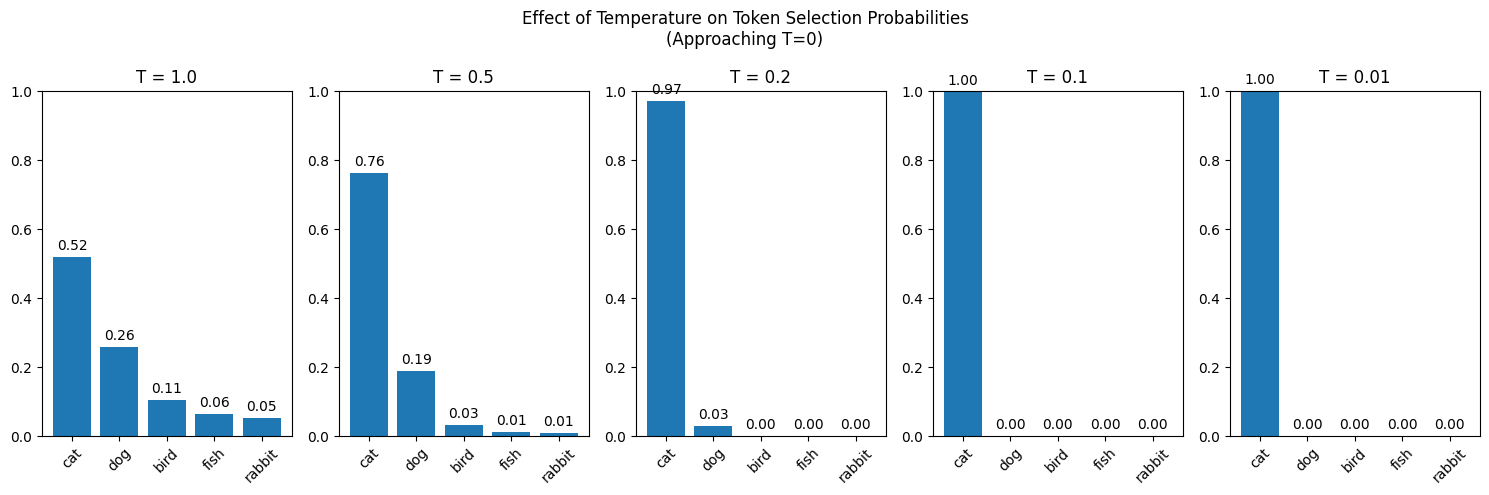


As temperature approaches 0:
- The highest scoring token ('cat') gets increasingly dominant
- Other token probabilities approach 0
- At T=0.01, selection becomes nearly deterministic
- Probability of 'cat' at T=0.01: 1.0000


In [2]:
# Create a concrete example of transformer token selection with temperature=0
import numpy as np
import matplotlib.pyplot as plt

# Sample logits for next token prediction (pre-softmax scores)
# Let's simulate scores for 5 candidate tokens
tokens = ['cat', 'dog', 'bird', 'fish', 'rabbit']
logits = np.array([2.5, 1.8, 0.9, 0.4, 0.2])

# Create figure with 5 subplots showing probability distribution at different temperatures
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
temperatures = [1.0, 0.5, 0.2, 0.1, 0.01]

for i, temp in enumerate(temperatures):
    # Apply temperature scaling and softmax
    scaled_logits = logits / temp
    probs = np.exp(scaled_logits) / np.sum(np.exp(scaled_logits))
    
    # Plot probabilities as bars
    axes[i].bar(tokens, probs)
    axes[i].set_title(f'T = {temp}')
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Annotate probabilities
    for j, prob in enumerate(probs):
        axes[i].text(j, prob + 0.02, f'{prob:.2f}', ha='center')

plt.suptitle('Effect of Temperature on Token Selection Probabilities\n(Approaching T=0)')
plt.tight_layout()
plt.show()

# Print analysis of what happens as T approaches 0
print("\nAs temperature approaches 0:")
print("- The highest scoring token ('cat') gets increasingly dominant")
print("- Other token probabilities approach 0")
print("- At T=0.01, selection becomes nearly deterministic")
print(f"- Probability of 'cat' at T=0.01: {probs[0]:.4f}")
